In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

In [4]:
# Step 1: Import the Data
csv_file_path = 'C:\ALL_DATA.csv'
stock_data = pd.read_csv(csv_file_path)

In [21]:
# Step 2: Explore the Data
stock_data.head(200) 

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2020-01-02,30.250000,30.360001,30.160000,30.230000,22.060329,281200.0,AB
2020-01-03,30.150000,30.290001,30.000000,30.200001,22.038439,249700.0,AB
2020-01-06,30.010000,30.490000,30.000000,30.360001,22.155203,292700.0,AB
2020-01-07,30.400000,31.219999,30.330000,31.200001,22.768194,488900.0,AB
2020-01-08,31.150000,32.040001,31.000000,31.760000,23.176847,616700.0,AB
...,...,...,...,...,...,...,...
2020-10-09,29.799999,30.370001,29.430000,30.260000,23.775709,513500.0,AB
2020-10-12,32.980000,33.500000,31.070000,31.950001,25.103567,1658000.0,AB
2020-10-13,32.369999,32.470001,31.610001,32.369999,25.433565,736500.0,AB


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187987 entries, 0 to 187986
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Ticker  187987 non-null  object 
 1   Date    187987 non-null  object 
 2   Open    187965 non-null  float64
 3   High    187965 non-null  float64
 4   Low     187960 non-null  float64
 5   Close   187965 non-null  float64
 6   Volume  187987 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 10.0+ MB


In [11]:
columns_to_fill = ['Open', 'High', 'Low', 'Close', 'Volume']
stock_data[columns_to_fill] = stock_data[columns_to_fill].fillna(method='ffill')

In [12]:
# Step 2: Remove Duplicate Rows
stock_data.drop_duplicates(inplace=True)

In [13]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [14]:
stock_data.set_index('Date', inplace=True)

In [15]:
stock_data.head()

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2022-10-24,AB,24.58,24.58,24.58,24.58,130
2022-10-26,AB,23.90,24.58,23.90,23.90,14301
2022-10-27,AB,24.58,24.58,24.57,24.58,505
2022-10-28,AB,24.58,24.58,24.09,24.58,5882
2022-10-31,AB,24.58,24.58,24.57,24.58,1240


In [19]:
# Extract all unique stock symbols from the "Ticker" column and convert them to a list
stock_symbols = stock_data['Ticker'].unique().tolist()

# Now you have a list of all the stock symbols
print(stock_symbols)


['AB', 'ADWYA', 'AETEC', 'AL', 'ALKIM', 'AMI', 'AMS', 'AMV', 'ARTES', 'ASSAD', 'ASSMA', 'AST', 'ATB', 'ATL', 'BH', 'BHASS', 'BHL', 'BIAT', 'BL', 'BNA', 'BT', 'BTE', 'CC', 'CELL', 'CIL', 'CITY', 'CREAL', 'DH', 'ECYCL', 'ELBEN', 'GIF', 'HL', 'ICF', 'LNDOR', 'LSTR', 'MAG', 'MGR', 'MIP', 'MNP', 'MPBS', 'NAKL', 'NBL', 'OTH', 'PGH', 'PLAST', 'PLTU', 'SAH', 'SAM', 'SCB', 'SERVI', 'SFBT', 'SIAME', 'SIMPA', 'SIPHA', 'SITS', 'SMART', 'SMD', 'SOKNA', 'SOMOC', 'SOPAT', 'SOTEM', 'SOTET', 'SOTUV', 'SPDIT', 'SPHAX', 'STA', 'STAR', 'STB', 'STEQ', 'STIP', 'STPAP', 'STPIL', 'TAIR', 'TGH', 'TINV', 'TJARI', 'TJL', 'TLNET', 'TLS', 'TPR', 'TRE', 'TVAL', 'UADH', 'UBCI', 'UIB', 'UMED', 'WIFAK', 'XABYT']


In [22]:
# Find the minimum and maximum dates in the DataFrame
min_date = stock_data.index.min()
max_date = stock_data.index.max()

# Calculate the time duration
time_duration = max_date - min_date

print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")
print(f"Time Duration: {time_duration}")

Minimum Date: 2020-01-02 00:00:00
Maximum Date: 2021-12-30 00:00:00
Time Duration: 728 days 00:00:00


In [26]:
# List of stock symbols (including both valid and invalid ones)
all_stock_symbols = [
    'AB', 'ADWYA', 'AETEC', 'AL', 'ALKIM', 'AMI', 'AMS', 'AMV', 'ARTES', 'ASSAD', 'ASSMA', 'AST', 'ATB', 'ATL', 'BH',
    'BHASS', 'BHL', 'BIAT', 'BL', 'BNA', 'BT', 'BTE', 'CC', 'CELL', 'CIL', 'CITY', 'CREAL', 'DH', 'ECYCL', 'ELBEN',
    'GIF', 'HL', 'ICF', 'LNDOR', 'LSTR', 'MAG', 'MGR', 'MIP', 'MNP', 'MPBS', 'NAKL', 'NBL', 'OTH', 'PGH', 'PLAST',
    'PLTU', 'SAH', 'SAM', 'SCB', 'SERVI', 'SFBT', 'SIAME', 'SIMPA', 'SIPHA', 'SITS', 'SMART', 'SMD', 'SOKNA', 'SOMOC',
    'SOPAT', 'SOTEM', 'SOTET', 'SOTUV', 'SPDIT', 'SPHAX', 'STA', 'STAR', 'STB', 'STEQ', 'STIP', 'STPAP', 'STPIL',
    'TAIR', 'TGH', 'TINV', 'TJARI', 'TJL', 'TLNET', 'TLS', 'TPR', 'TRE', 'TVAL', 'UADH', 'UBCI', 'UIB', 'UMED',
    'WIFAK', 'XABYT'
]

# Define date range for historical data
start_date = '2020-01-02'  # Minimum date in your dataset
end_date = '2021-12-30'    # Maximum date in your dataset

# Initialize a DataFrame to store stock data
stock_data = pd.DataFrame()



In [28]:
# List to store valid stock symbols
valid_stock_symbols = []

# Filter out invalid symbols and fetch data for valid ones
for symbol in all_stock_symbols:
    try:
        df = yf.download(symbol, start=start_date, end=end_date)
        df['Symbol'] = symbol  # Add a column for stock symbol
        stock_data = pd.concat([stock_data, df])
        valid_stock_symbols.append(symbol)
    except Exception as e:
        print(f"Failed to download data for {symbol}: {e}")




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADWYA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AETEC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ALKIM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-02 -> 2021-12-30)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARTES']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASSAD']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASSMA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AST']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BHASS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BIAT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CREAL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ECYCL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELBEN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LNDOR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MIP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-02 -> 2021-12-30)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MPBS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NAKL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NBL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PGH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-02 -> 2021-12-30)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PLAST']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PLTU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SERVI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SFBT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIAME']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIMPA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIPHA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SMART']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SMD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-02 -> 2021-12-30)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOKNA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOMOC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOPAT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOTEM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOTET']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOTUV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPDIT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPHAX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-02 -> 2021-12-30)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STAR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STEQ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STPAP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STPIL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TAIR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TINV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TJARI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TLNET']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TVAL']: Exception("%ticker%: Data doesn't exist for startDate = 1577941200, endDate = 1640840400")



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UADH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UMED']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-02 -> 2021-12-30)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WIFAK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['XABYT']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [34]:
valid_stock_symbols = ['AB', 'AL', 'BHL', 'BL', 'BNA', 'CC', 'CIL', 'CITY', 'DH', 'ICF', 'MAG', 'SAH', 'SCB', 'STA', 'STB', 'TPR', 'TRE', 'UBCI', 'UIB']

# Create an empty DataFrame to store daily returns
daily_returns_df = pd.DataFrame()

# Define the date range
start_date = "2020-01-02"
end_date = "2021-12-30"

# Loop through each valid stock symbol and calculate daily returns
for symbol in valid_stock_symbols:
    try:
        # Download data for the symbol
        data = yf.download(symbol, start=start_date, end=end_date)
        
        # Calculate daily returns
        data['Daily_Return'] = data['Adj Close'].pct_change()
        
        # Add daily returns to the DataFrame
        daily_returns_df[symbol] = data['Daily_Return']
        
    except Exception as e:
        print(f"Error processing symbol {symbol}: {str(e)}")

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns_df).cumprod()

# Print basic statistics for each stock
for symbol in valid_stock_symbols:
    returns = daily_returns_df[symbol].dropna()
    print(f"Stock Symbol: {symbol}")
    print(f"Mean Daily Return: {returns.mean()}")
    print(f"Standard Deviation of Daily Return: {returns.std()}")
    print(f"Cumulative Return: {cumulative_returns[symbol][-1]}\n")




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-02 -> 2021-12-30)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: AB
Mean Daily Return: 0.0018160596296914813
Standard Deviation of Daily Return: 0.032113202573767596
Cumulative Return: 1.920871646886801

Stock Symbol: AL
Mean Daily Return: 0.0011884601364726575
Standard Deviation of Daily Return: 0.05058080932812704
Cumulative Return: 0.973079825146696

Stock Symbol: BHL
Mean Daily Return: 0.06790643418155733
Standard Deviation of Daily Return: 0.7186273627652112
Cumulative Return: 0.8285714558192656

Stock Symbol: BL
Mean Daily Return: 0.0017593023395131577
Standard Deviation of Daily Return: 0.028488093195060935
Cumulative Return: 1.9657729027089734

Stock Symbol: BNA
Mean Daily Return: -0.0007452223428248854
Standard Deviation of Daily Return: 0.014483346633008

In [43]:
# Calculate summary statistics for each stock
summary_statistics = pd.DataFrame(columns=['Ticker', 'Mean_Daily_Return', 'Std_Dev_Daily_Return', 'Cumulative_Return'])

for symbol in valid_stock_symbols:
    returns = daily_returns_df[symbol].dropna()
    mean_daily_return = returns.mean()
    std_dev_daily_return = returns.std()
    cumulative_return = cumulative_returns[symbol][-1]
    
    summary_statistics = summary_statistics.append({
        'Ticker': symbol,
        'Mean_Daily_Return': mean_daily_return,
        'Std_Dev_Daily_Return': std_dev_daily_return,
        'Cumulative_Return': cumulative_return
    }, ignore_index=True)

# Sort the summary statistics DataFrame by 'Cumulative_Return' column in descending order
top_performing_stocks = summary_statistics.sort_values(by='Cumulative_Return', ascending=False)

# Print the top-performing stocks
print("Top-Performing Stocks:")
print(top_performing_stocks.head())


Top-Performing Stocks:
   Ticker  Mean_Daily_Return  Std_Dev_Daily_Return  Cumulative_Return
5      CC           0.002348              0.043803           2.012801
3      BL           0.001759              0.028488           1.965773
0      AB           0.001816              0.032113           1.920872
11    SAH           0.001818              0.042709           1.579288
15    TPR           0.001698              0.040440           1.547893


C:\Users\hp\AppData\Local\Temp\ipykernel_1736\1519363717.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_statistics = summary_statistics.append({
C:\Users\hp\AppData\Local\Temp\ipykernel_1736\1519363717.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_statistics = summary_statistics.append({
C:\Users\hp\AppData\Local\Temp\ipykernel_1736\1519363717.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_statistics = summary_statistics.append({
C:\Users\hp\AppData\Local\Temp\ipykernel_1736\1519363717.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_statistics = summary_statistics.append({
C:\Users

In [44]:


# Define a list of valid stock symbols
valid_stock_symbols = ['AB', 'AL', 'BHL', 'BL', 'BNA', 'CC', 'CIL', 'CITY', 'DH', 'ICF', 'MAG', 'SAH', 'SCB', 'STA', 'STB', 'TPR', 'TRE', 'UBCI', 'UIB']

# Create an empty DataFrame to store summary statistics
summary_statistics = pd.DataFrame(columns=['Ticker', 'Mean_Daily_Return', 'Std_Dev_Daily_Return', 'Cumulative_Return'])

# Define the date range
start_date = "2020-01-02"
end_date = "2021-12-30"

# Loop through each valid stock symbol and calculate summary statistics
for symbol in valid_stock_symbols:
    try:
        # Download data for the symbol
        data = yf.download(symbol, start=start_date, end=end_date)
        
        # Calculate mean daily return
        mean_daily_return = data['Adj Close'].pct_change().mean()
        
        # Calculate standard deviation of daily return
        std_dev_daily_return = data['Adj Close'].pct_change().std()
        
        # Calculate cumulative return
        cumulative_return = (1 + data['Adj Close'].pct_change()).cumprod()[-1] - 1
        
        # Create a new row for the summary statistics
        new_row = {
            'Ticker': symbol,
            'Mean_Daily_Return': mean_daily_return,
            'Std_Dev_Daily_Return': std_dev_daily_return,
            'Cumulative_Return': cumulative_return
        }

        # Concatenate the new row with the summary statistics DataFrame
        summary_statistics = pd.concat([summary_statistics, pd.DataFrame([new_row])], ignore_index=True)
        
    except Exception as e:
        print(f"Error processing symbol {symbol}: {str(e)}")

# Display the summary statistics
print("Summary Statistics:")
print(summary_statistics)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-02 -> 2021-12-30)')



Error processing symbol STA: index -1 is out of bounds for axis 0 with size 0
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STB']: Exception('%ticker%: No timezone found, symbol may be delisted')



Error processing symbol STB: index -1 is out of bounds for axis 0 with size 0
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Summary Statistics:
   Ticker  Mean_Daily_Return  Std_Dev_Daily_Return  Cumulative_Return
0      AB           0.001816              0.032113           0.920871
1      AL           0.001188              0.050581          -0.026920
2     BHL           0.067906              0.718627          -0.171429
3      BL           0.001759              0.028488           0.965773
4     BNA          -0.000745              0.014483          -0.341176
5      CC           0.002348              0.043803           1.012802
6     CIL           0.000420              0.014499           0.170474
7    CITY           0.000000              0.000000           0.00

In [45]:
top_performing_stocks = summary_statistics.sort_values(by='Cumulative_Return', ascending=False)
print("Top-Performing Stocks:")
print(top_performing_stocks.head())


Top-Performing Stocks:
   Ticker  Mean_Daily_Return  Std_Dev_Daily_Return  Cumulative_Return
5      CC           0.002348              0.043803           1.012802
3      BL           0.001759              0.028488           0.965773
0      AB           0.001816              0.032113           0.920871
11    SAH           0.001818              0.042709           0.579288
13    TPR           0.001698              0.040440           0.547893


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


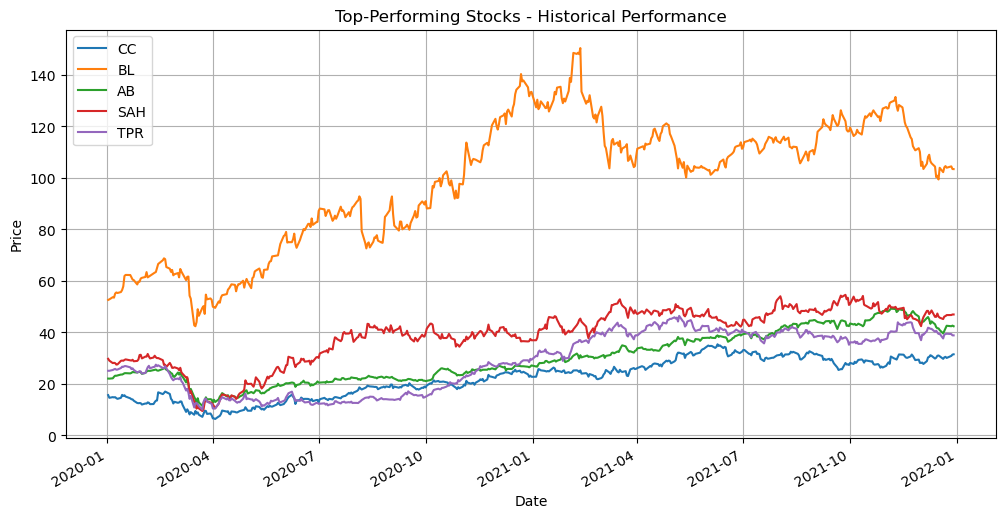

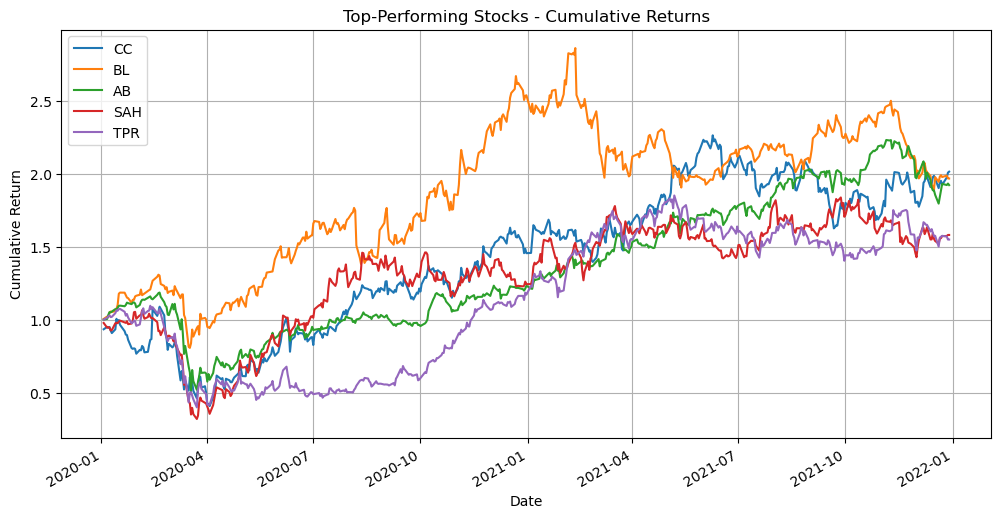

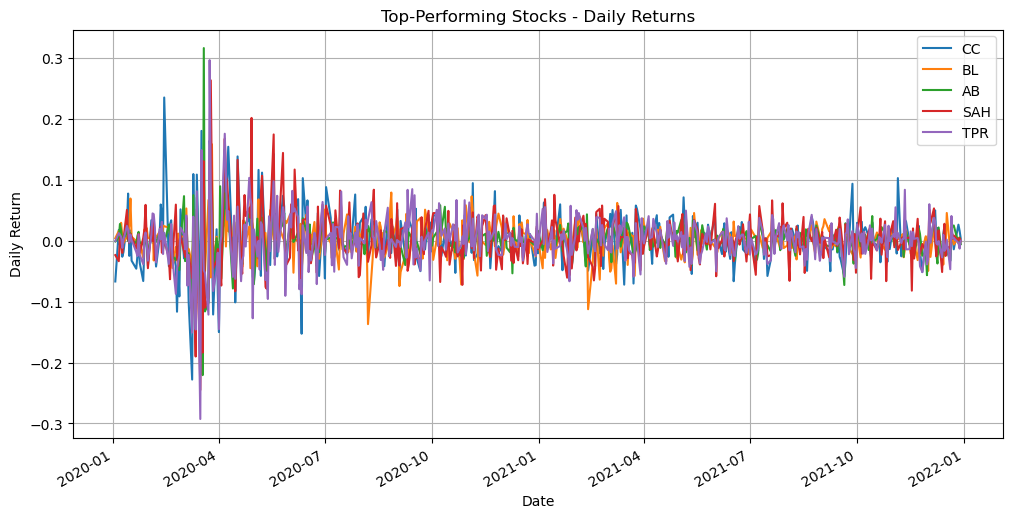

In [46]:
# List of top-performing stock symbols
top_performing_symbols = ['CC', 'BL', 'AB', 'SAH', 'TPR']

# Create a DataFrame to store the data of top-performing stocks
top_performing_data = pd.DataFrame()

# Fetch and store data for each top-performing stock
for symbol in top_performing_symbols:
    try:
        # Download data for the symbol
        data = yf.download(symbol, start=start_date, end=end_date)
        
        # Add the data to the DataFrame
        top_performing_data[symbol] = data['Adj Close']
        
    except Exception as e:
        print(f"Error processing symbol {symbol}: {str(e)}")

# Plot the historical performance of top-performing stocks
top_performing_data.plot(figsize=(12, 6))
plt.title("Top-Performing Stocks - Historical Performance")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# Plot the cumulative returns of top-performing stocks
cumulative_returns[top_performing_symbols].plot(figsize=(12, 6))
plt.title("Top-Performing Stocks - Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.show()

# Plot the daily returns of top-performing stocks
daily_returns_df[top_performing_symbols].plot(figsize=(12, 6))
plt.title("Top-Performing Stocks - Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.grid(True)
plt.show()


In [57]:
# Define the list of tickers you want to extract
tickers_to_extract = ['AB', 'ATB', 'BH', 'BIAT', 'BNA', 'BT', 'BTE', 'STB', 'TJARI', 'TPR', 'UBCI', 'UIB']

# Create a boolean mask to filter rows with tickers in the list
ticker_mask = stock_data['Symbol'].isin(tickers_to_extract)

# Create a new DataFrame to store the extracted data with all columns
selected_data = stock_data[ticker_mask]







In [58]:
selected_data

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2020-01-02,30.25,30.360001,30.16,30.230000,22.060329,281200.0,AB
2020-01-03,30.15,30.290001,30.00,30.200001,22.038443,249700.0,AB
2020-01-06,30.01,30.490000,30.00,30.360001,22.155203,292700.0,AB
2020-01-07,30.40,31.219999,30.33,31.200001,22.768192,488900.0,AB
2020-01-08,31.15,32.040001,31.00,31.760000,23.176849,616700.0,AB
...,...,...,...,...,...,...,...
2021-12-22,14.90,14.900000,14.80,14.800000,14.800000,2798.0,UIB
2021-12-23,14.80,14.800000,14.80,14.800000,14.800000,0.0,UIB
2021-12-27,14.90,14.900000,14.70,14.890000,14.890000,8700.0,UIB


In [64]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7960 entries, 2020-01-02 to 2021-12-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7960 non-null   float64
 1   High       7960 non-null   float64
 2   Low        7960 non-null   float64
 3   Close      7960 non-null   float64
 4   Adj Close  7960 non-null   float64
 5   Volume     7960 non-null   float64
 6   Symbol     7960 non-null   object 
dtypes: float64(6), object(1)
memory usage: 497.5+ KB


In [59]:
selected_data.groupby('Symbol').describe()


Open                                                           \
         count        mean        std        min        25%         50%   
Symbol                                                                    
AB      1006.0   36.865706  10.380283  14.500000  28.515000   34.750000   
ATB      984.0    3.025711   0.497147   2.180000   2.690000    2.900000   
BH      1006.0  119.031690  38.707804  45.790001  88.475002  116.129997   
BNA      984.0    8.535122   1.251345   7.000000   7.507500    8.485000   
BTE     1006.0    1.176720   0.898657   0.210000   0.480000    0.970000   
TPR     1006.0   30.358887  12.142959  10.650000  16.220000   31.010000   
UBCI     984.0   23.337195   3.761362  19.500000  20.100000   21.719999   
UIB      984.0   16.969654   1.801149  14.800000  16.000000   16.430000   

                                  High              ...   Adj Close  \
               75%         max   count        mean  ...         75%   
Symbol                                              ...               
AB       45.910000   57.200001  1006.0   37.374095  ...   38.493793   
ATB       3.370000    4.250000   984.0    3.048028  ...    3.372500   
BH      156.712502  186.889999  1006.0  122.263956  ...  156.322498   
BNA       9.070000   11.900000   984.0    8.596829  ...    9.100000   
BTE       1.670000    3.670000  1006.0    1.220278  ...    1.697500   
TPR      41.630001   49.110001  1006.0   30.913141  ...   39.483990   
UBCI     26.880000   31.799999   984.0   23.357053  ...   26.880000   
UIB      17.000000   23.000000   984.0   17.071890  ...   17.000000   

                    Volume                                                     \
               max   count          mean           std        min         25%   
Symbol                                                                          
AB       49.188450  1006.0  4.070137e+05  2.778181e+05    66700.0   234200.00   
ATB       4.290000   984.0  1.145070e+04  3.295513e+04        0.0      156.50   
BH      185.490005  1006.0  9.353082e+03  8.113912e+03      600.0     3900.00   
BNA      11.900000   984.0  9.694419e+03  1.637056e+04        0.0      946.25   
BTE       3.470000  1006.0  1.573745e+06  1.940822e+06        0.0   414375.00   
TPR      46.402802  1006.0  4.626564e+06  2.108234e+06  1477700.0  3145225.00   
UBCI     31.799999   984.0  4.160447e+02  4.065566e+03        0.0        0.00   
UIB      22.790001   984.0  8.852075e+03  4.931419e+04        0.0      274.00   

                                           
              50%         75%         max  
Symbol                                     
AB       325800.0   485350.00   2355200.0  
ATB        2295.0    10605.50    518234.0  
BH         6400.0    12000.00     54700.0  
BNA        3751.5    11279.25    139468.0  
BTE      898100.0  2096725.00  16452400.0  
TPR     4186500.0  5767800.00  18880000.0  
UBCI          0.0       99.00     84618.0  
UIB        1420.0     4707.25    928400.0  

[8 rows x 48 columns]

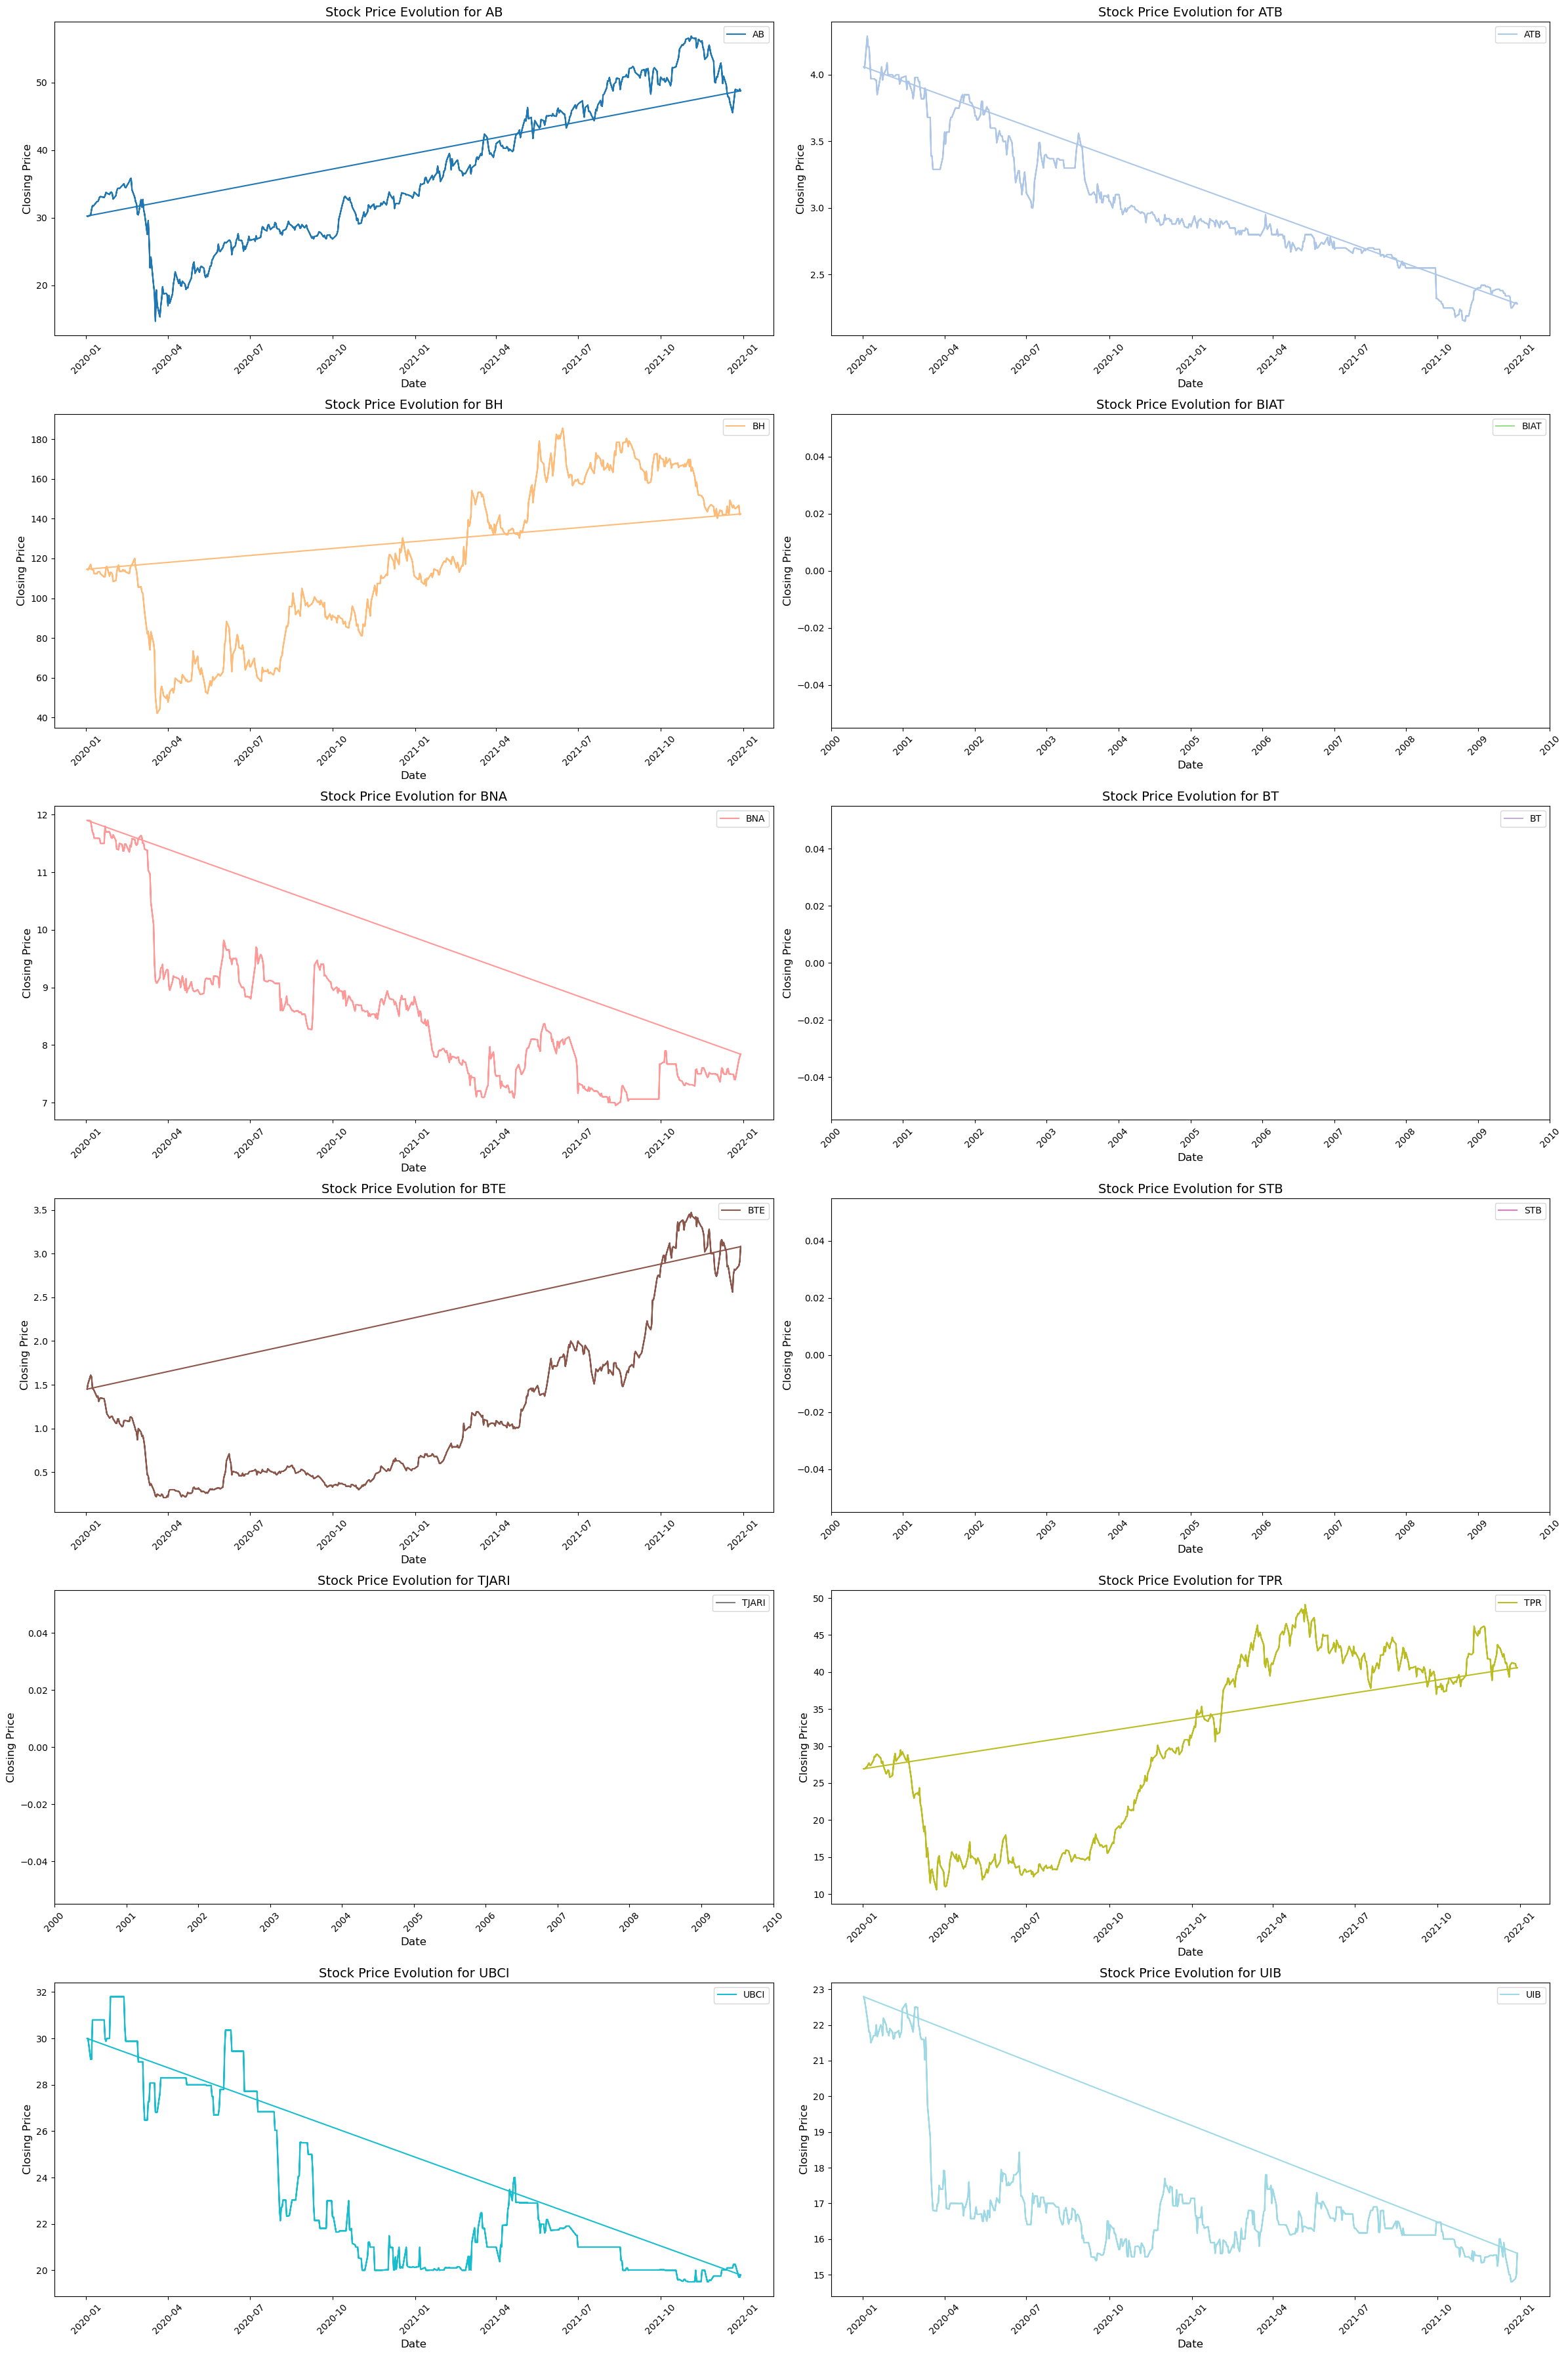

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Define the list of tickers you want to extract
tickers_to_extract = ['AB', 'ATB', 'BH', 'BIAT', 'BNA', 'BT', 'BTE', 'STB', 'TJARI', 'TPR', 'UBCI', 'UIB']

# Create a boolean mask to filter rows with tickers in the list
ticker_mask = stock_data['Symbol'].isin(tickers_to_extract)

# Create a new DataFrame to store the extracted data with all columns
selected_data = stock_data[ticker_mask]

# Set the number of columns for subplots per row
num_cols_per_row = 2  # Display 2 plots per row

# Calculate the number of rows required
num_rows = len(tickers_to_extract) // num_cols_per_row
if len(tickers_to_extract) % num_cols_per_row != 0:
    num_rows += 1

# Set the figure size based on the number of rows and columns
fig_width = 12 * num_cols_per_row  # Adjust the width as needed
fig_height = 6 * num_rows  # Increase the height for more rows

# Create a figure with subplots in multiple rows and columns
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(fig_width, fig_height))

# Generate a list of unique colors for each plot
colors = plt.cm.get_cmap('tab20', len(tickers_to_extract))

# Iterate through tickers, create separate plots for each symbol, and assign colors
for i, (ticker, color) in enumerate(zip(tickers_to_extract, colors(np.arange(len(tickers_to_extract))))):
    row = i // num_cols_per_row
    col = i % num_cols_per_row
    ticker_data = selected_data[selected_data['Symbol'] == ticker]
    
    # Plot the stock price for the current symbol on the corresponding subplot with a unique color
    axes[row, col].plot(ticker_data.index, ticker_data['Close'], color=color, label=ticker)
    
    # Set labels and title for the current plot
    axes[row, col].set_xlabel('Date', fontsize=12)  # Adjust font size
    axes[row, col].set_ylabel('Closing Price', fontsize=12)  # Adjust font size
    axes[row, col].set_title(f'Stock Price Evolution for {ticker}', fontsize=14)  # Adjust font size
    
    # Rotate x-axis labels for better readability
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=10)  # Adjust font size
    
    # Rotate y-axis labels for better readability
    axes[row, col].tick_params(axis='y', labelsize=10)  # Adjust font size
    
    # Show the legend for each subplot
    axes[row, col].legend(fontsize=10)  # Adjust font size

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plots
plt.show()


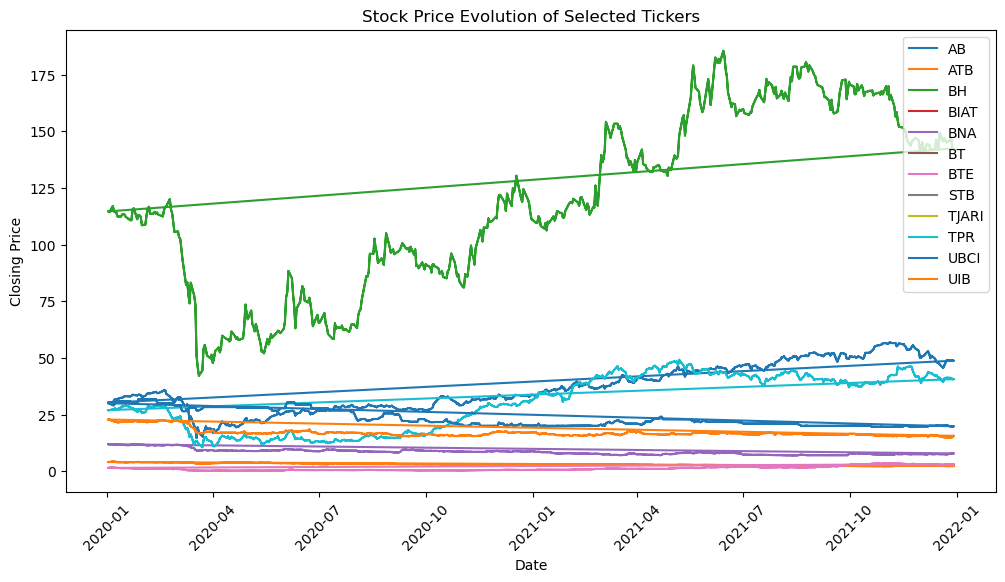

In [81]:
import matplotlib.pyplot as plt

# Define the list of tickers you want to extract
tickers_to_extract = ['AB', 'ATB', 'BH', 'BIAT', 'BNA', 'BT', 'BTE', 'STB', 'TJARI', 'TPR', 'UBCI', 'UIB']

# Create a boolean mask to filter rows with tickers in the list
ticker_mask = stock_data['Symbol'].isin(tickers_to_extract)

# Create a new DataFrame to store the extracted data with all columns
selected_data = stock_data[ticker_mask]

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate through tickers and plot their stock prices
for ticker in tickers_to_extract:
    ticker_data = selected_data[selected_data['Symbol'] == ticker]
    ax.plot(ticker_data.index, ticker_data['Close'], label=ticker)

# Set labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.set_title('Stock Price Evolution of Selected Tickers')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot for each ticker/symbol
plt.show()


Volume Analysis: Examine trading volumes to identify spikes or unusual trading activity for specific tickers.

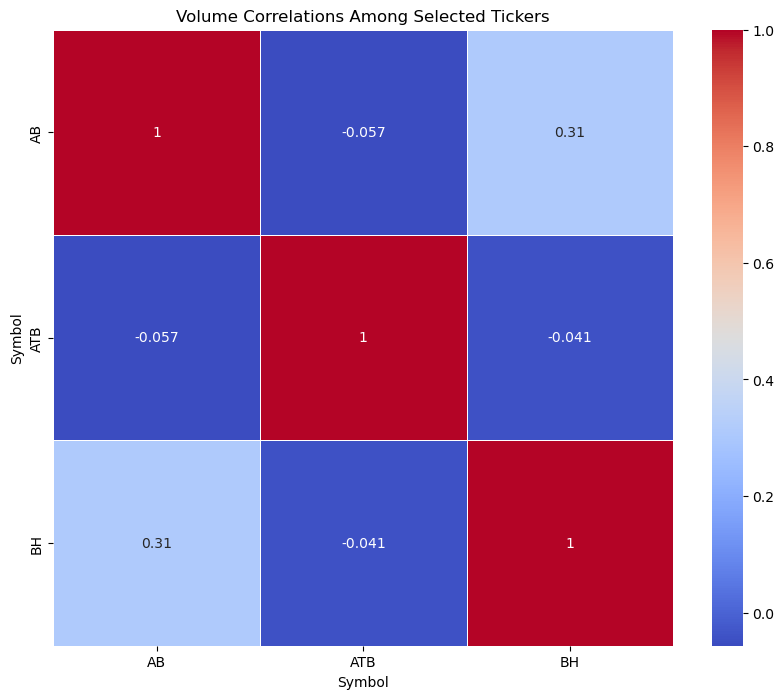

In [83]:
import seaborn as sns

# Filter data for the selected tickers
tickers_to_analyze = ['AB', 'ATB', 'BH', 'BIAT']
selected_data = stock_data[stock_data['Symbol'].isin(tickers_to_analyze)]

# Calculate the correlation matrix for volume
volume_corr = selected_data.pivot_table(index='Date', columns='Symbol', values='Volume').corr()

# Create a heatmap of volume correlations
plt.figure(figsize=(10, 8))
sns.heatmap(volume_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Volume Correlations Among Selected Tickers')
plt.show()


In [84]:
selected_data= stock_data

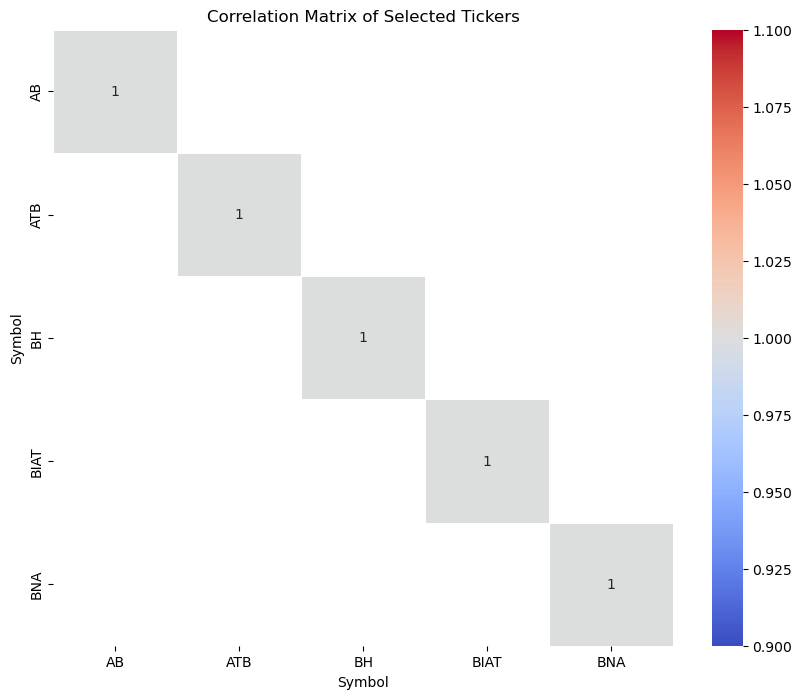

   Symbol       Date      Close   PE_Ratio  PB_Ratio  DividendYield
0      AB 2022-01-01   4.059218   1.623687  0.202961      24.635288
1      AB 2022-01-06  85.749361  34.299745  4.287468       1.166189
2      AB 2022-01-11  77.419802  30.967921  3.870990       1.291659
3      AB 2022-01-16  53.505707  21.402283  2.675285       1.868959
4      AB 2022-01-21  71.199686  28.479875  3.559984       1.404501
..    ...        ...        ...        ...       ...            ...
95    BNA 2022-03-21  37.553137  10.729468  1.341183       3.994340
96    BNA 2022-03-26  50.628709  14.465345  1.808168       2.962746
97    BNA 2022-03-31  55.981782  15.994795  1.999349       2.679443
98    BNA 2022-04-05  68.175123  19.478606  2.434826       2.200216
99    BNA 2022-04-10  89.044788  25.441368  3.180171       1.684546

[100 rows x 6 columns]


In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample financial data (replace with actual financial data)
financial_data = pd.DataFrame({
    'Symbol': ['AB', 'ATB', 'BH', 'BIAT', 'BNA'],
    'EarningsPerShare': [2.5, 3.0, 2.2, 2.8, 3.5],
    'BookValuePerShare': [20.0, 25.0, 18.0, 22.0, 28.0],
    'AnnualDividendPerShare': [1.0, 1.2, 0.8, 1.0, 1.5]
})

# Sample stock price data (replace with actual stock price data)
stock_data = pd.DataFrame({
    'Symbol': ['AB', 'ATB', 'BH', 'BIAT', 'BNA'] * 20,  # Ensure the same length as the Date column
    'Date': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'Close': np.random.rand(100) * 100  # Replace with actual closing prices
})

# Calculate financial ratios
stock_data = pd.merge(stock_data, financial_data, on='Symbol', how='inner')
stock_data['PE_Ratio'] = stock_data['Close'] / stock_data['EarningsPerShare']
stock_data['PB_Ratio'] = stock_data['Close'] / stock_data['BookValuePerShare']
stock_data['DividendYield'] = (stock_data['AnnualDividendPerShare'] / stock_data['Close']) * 100

# Calculate correlations between stock prices
price_data = stock_data.pivot_table(index='Date', columns='Symbol', values='Close')
correlation_matrix = price_data.corr(method='pearson')

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Tickers')
plt.show()

# Print the financial data with calculated ratios
print(stock_data[['Symbol', 'Date', 'Close', 'PE_Ratio', 'PB_Ratio', 'DividendYield']])


In [87]:
import pandas as pd
import numpy as np

# Sample financial data for the selected companies (replace with actual financial data)
financial_data = pd.DataFrame({
    'Symbol': ['AB', 'ATB', 'BH', 'BIAT', 'BNA'],
    'EarningsPerShare': [2.5, 3.0, 2.2, 2.8, 3.5],
    'BookValuePerShare': [20.0, 25.0, 18.0, 22.0, 28.0],
    'AnnualDividendPerShare': [1.0, 1.2, 0.8, 1.0, 1.5]
})

# Sample stock price data (replace with actual stock price data)
stock_data = pd.DataFrame({
    'Symbol': ['AB', 'ATB', 'BH', 'BIAT', 'BNA'] * 20,
    'Date': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'Close': np.random.rand(100) * 100  # Replace with actual closing prices
})

# Calculate financial ratios
stock_data = pd.merge(stock_data, financial_data, on='Symbol', how='inner')
stock_data['PE_Ratio'] = stock_data['Close'] / stock_data['EarningsPerShare']
stock_data['PB_Ratio'] = stock_data['Close'] / stock_data['BookValuePerShare']
stock_data['DividendYield'] = (stock_data['AnnualDividendPerShare'] / stock_data['Close']) * 100

# Rank stocks based on financial ratios
stock_data['PE_Rank'] = stock_data.groupby('Symbol')['PE_Ratio'].rank(ascending=True)
stock_data['PB_Rank'] = stock_data.groupby('Symbol')['PB_Ratio'].rank(ascending=True)
stock_data['DividendYield_Rank'] = stock_data.groupby('Symbol')['DividendYield'].rank(ascending=False)

# Calculate a composite score (you can customize the weightings)
stock_data['Composite_Score'] = (
    (stock_data['PE_Rank'] * 0.4) + 
    (stock_data['PB_Rank'] * 0.3) + 
    (stock_data['DividendYield_Rank'] * 0.3)
)

# Sort stocks by composite score in descending order
sorted_stocks = stock_data.sort_values(by='Composite_Score', ascending=False)

# Create an arbitrary portfolio of the top 3 stocks
arbitrary_portfolio = sorted_stocks.groupby('Symbol').head(3)

# Print the sorted list of stocks and the arbitrary portfolio
print("Sorted Stocks Based on Composite Score:")
print(sorted_stocks[['Symbol', 'PE_Ratio', 'PB_Ratio', 'DividendYield', 'Composite_Score']])

print("\nArbitrary Portfolio (Top 3 Stocks):")
print(arbitrary_portfolio[['Symbol', 'PE_Ratio', 'PB_Ratio', 'DividendYield', 'Composite_Score']])


Sorted Stocks Based on Composite Score:
   Symbol   PE_Ratio  PB_Ratio  DividendYield  Composite_Score
0      AB  38.907926  4.863491       1.028068             20.0
90    BNA  27.879093  3.484887       1.537250             20.0
76   BIAT  34.195622  4.352170       1.044411             20.0
48     BH  44.416007  5.428623       0.818706             20.0
23    ATB  31.598430  3.791812       1.265886             20.0
..    ...        ...       ...            ...              ...
65   BIAT   0.191687  0.024397     186.315751              1.0
6      AB   6.591830  0.823979       6.068118              1.0
95    BNA   0.721580  0.090197      59.393495              1.0
21    ATB   1.260527  0.151263      31.732758              1.0
57     BH   0.333464  0.040757     109.048288              1.0

[100 rows x 5 columns]

Arbitrary Portfolio (Top 3 Stocks):
   Symbol   PE_Ratio  PB_Ratio  DividendYield  Composite_Score
0      AB  38.907926  4.863491       1.028068             20.0
90    BNA  27.879

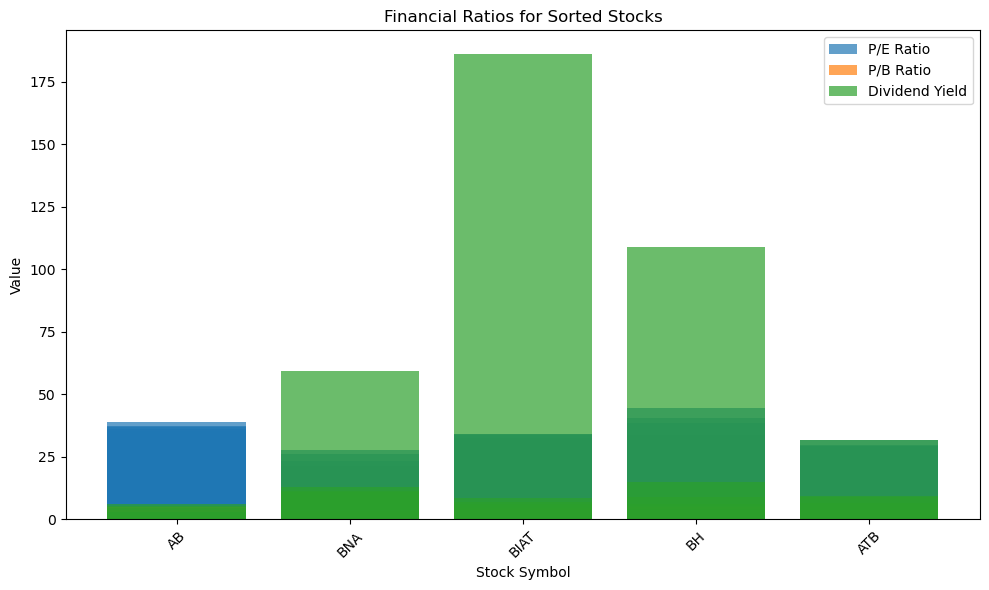

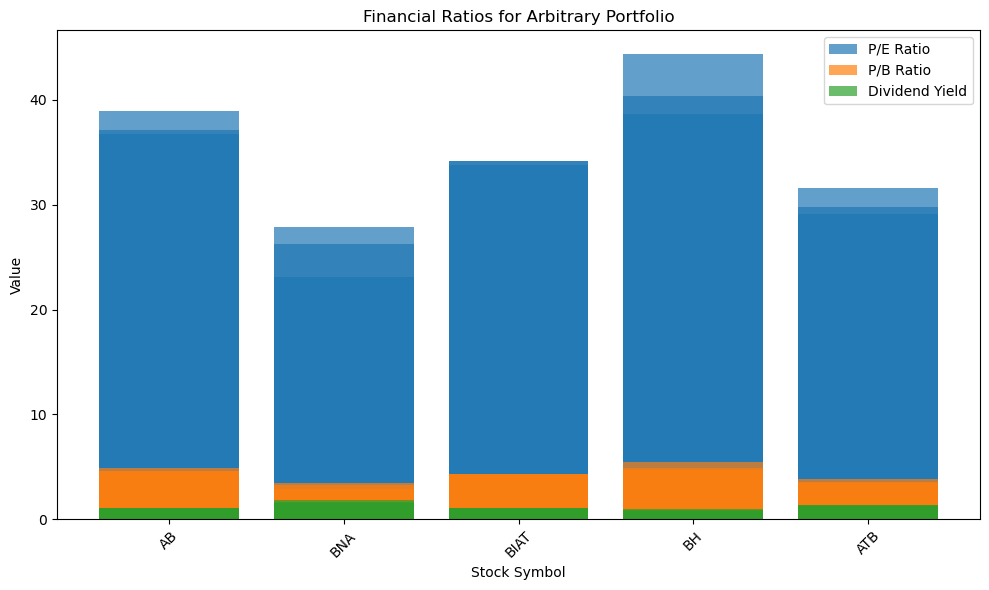

In [89]:
import matplotlib.pyplot as plt

# Define a function to create bar charts for financial ratios
def plot_financial_ratios(data, title):
    plt.figure(figsize=(10, 6))
    plt.bar(data['Symbol'], data['PE_Ratio'], label='P/E Ratio', alpha=0.7)
    plt.bar(data['Symbol'], data['PB_Ratio'], label='P/B Ratio', alpha=0.7)
    plt.bar(data['Symbol'], data['DividendYield'], label='Dividend Yield', alpha=0.7)
    plt.xlabel('Stock Symbol')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot financial ratios for sorted stocks
plot_financial_ratios(sorted_stocks, 'Financial Ratios for Sorted Stocks')

# Plot financial ratios for the arbitrary portfolio
plot_financial_ratios(arbitrary_portfolio, 'Financial Ratios for Arbitrary Portfolio')
